In [18]:
import covasim as cv
import matplotlib.pyplot as plt

Initializing sim with 200000 people for 140 days
  Running 2020-02-10 ( 0/140) (2.86 s)  ———————————————————— 1%
  Running 2020-02-20 (10/140) (3.51 s)  •——————————————————— 8%
  Running 2020-03-01 (20/140) (4.28 s)  ••—————————————————— 15%
  Running 2020-03-11 (30/140) (5.05 s)  ••••———————————————— 22%
  Running 2020-03-21 (40/140) (5.79 s)  •••••——————————————— 29%
  Running 2020-03-31 (50/140) (6.79 s)  •••••••————————————— 36%
  Running 2020-04-10 (60/140) (7.51 s)  ••••••••———————————— 43%
  Running 2020-04-20 (70/140) (8.40 s)  ••••••••••—————————— 50%
  Running 2020-04-30 (80/140) (9.08 s)  •••••••••••————————— 57%
  Running 2020-05-10 (90/140) (9.93 s)  ••••••••••••———————— 65%
  Running 2020-05-20 (100/140) (10.75 s)  ••••••••••••••—————— 72%
  Running 2020-05-30 (110/140) (12.64 s)  •••••••••••••••————— 79%
  Running 2020-06-09 (120/140) (14.40 s)  •••••••••••••••••——— 86%
  Running 2020-06-19 (130/140) (16.04 s)  ••••••••••••••••••—— 93%
  Running 2020-06-29 (140/140) (17.

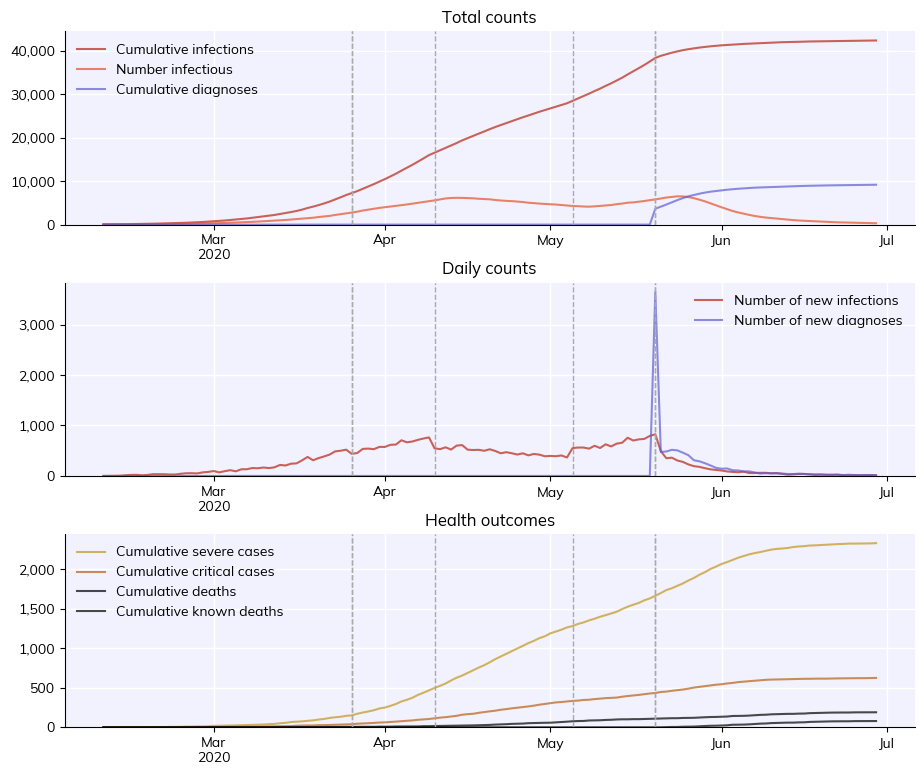

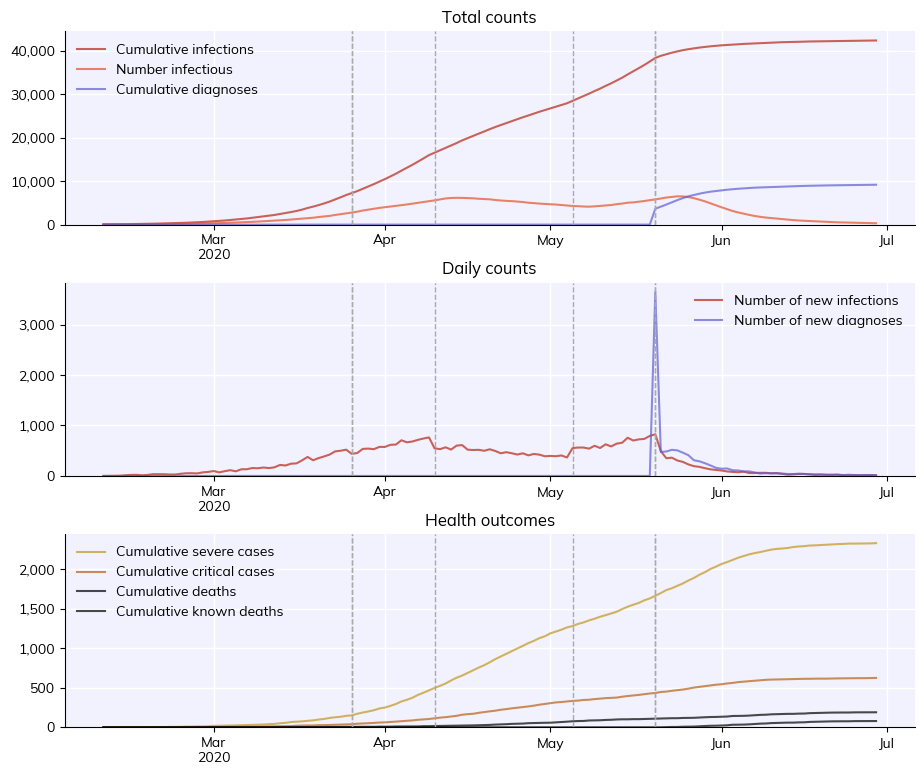

In [22]:
pars = dict(
pop_size = 200e3, # Define a population size of 200,000 people
pop_infected = 75, # Start with 75 infected individuals
beta = 0.012, # Calibrate overall transmission to this setting
pop_type = 'hybrid', # Use realistic household, school, and work contacts
start_day = '2020-02-10', # First day of the simulation
end_day = '2020-06-29', # Last day of the simulation 
)

# Define the interventions 

tr_probs=dict(h=0.9, s=0.7, w=0.7, c=0.3) # Probability that a contact in each layer will be traced 
tr_time = dict(h=0.0, s=1.0, w=1.0, c=3.0) # Time required to trace contacts in each layer (days)
m_days = ['2020-03-26', '2020-04-10', '2020-05-05'] # Days on which mobility changes
m_changes = [0.7, 0.4, 0.8] # Define the mobility changes on these days 



interventions = [
cv.clip_edges(days='2020-03-26', changes=0.0, layers='s'), # Close schools
cv.clip_edges(days=m_days, changes=m_changes, layers=['w', 'c']), # Close/reopen work + community
cv.test_prob(start_day='2020-05-20', symp_prob=8.1, symp_quar_prob=0.8, test_delay=1), # Testing
cv.contact_tracing(start_day='2020-05-20', trace_probs=tr_probs, trace_time=tr_time) # Contact tracing
]
#  Create and run the simulation
sim = cv.Sim(pars=pars, interventions=interventions)
sim.run()
sim.plot()

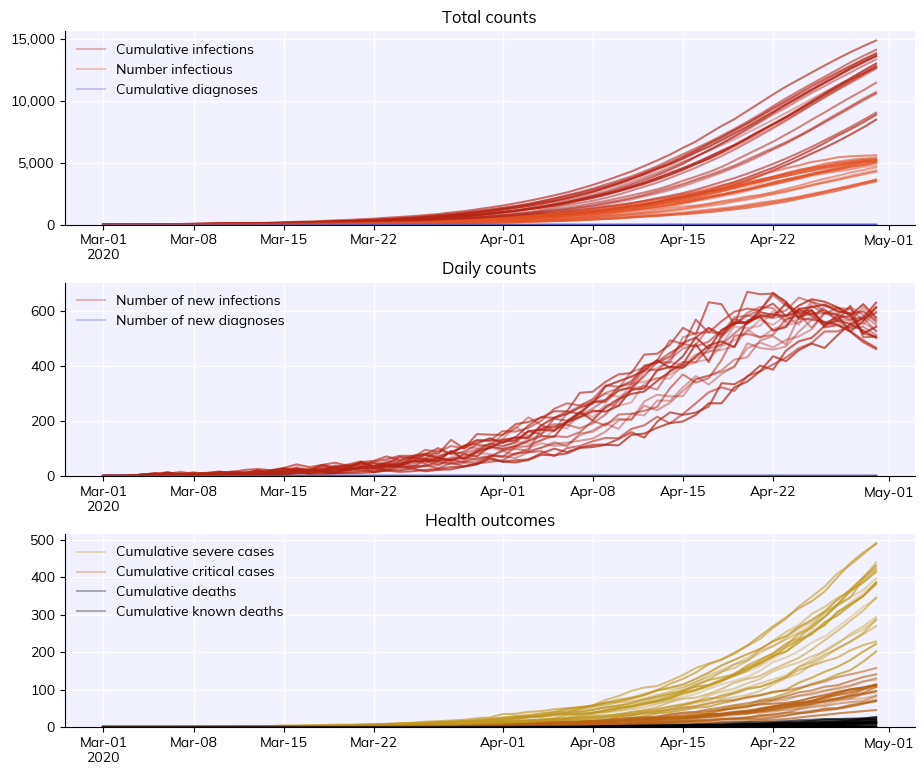

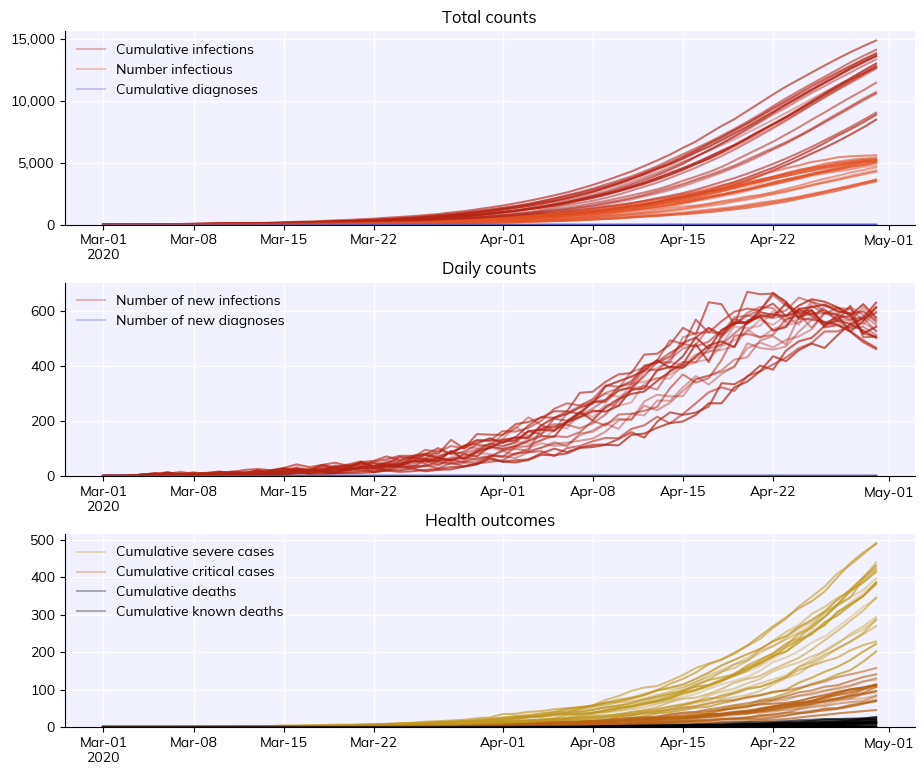

In [41]:
sim = cv.Sim()
msims=cv.MultiSim(sim)
msims.run(n_runs=20)

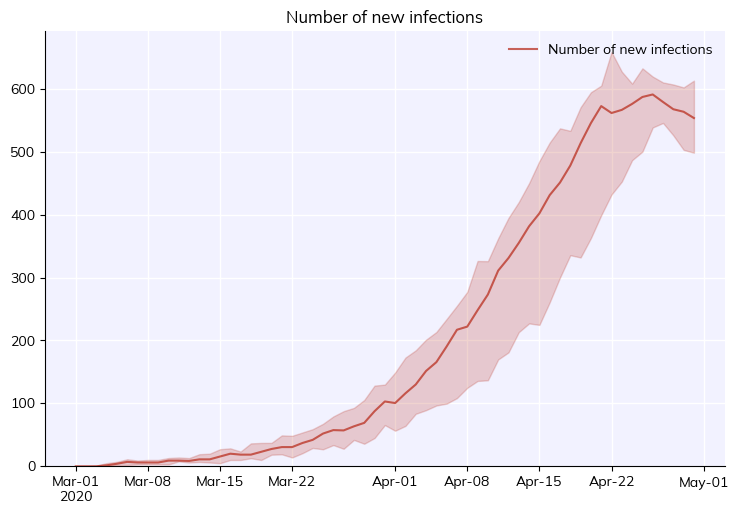

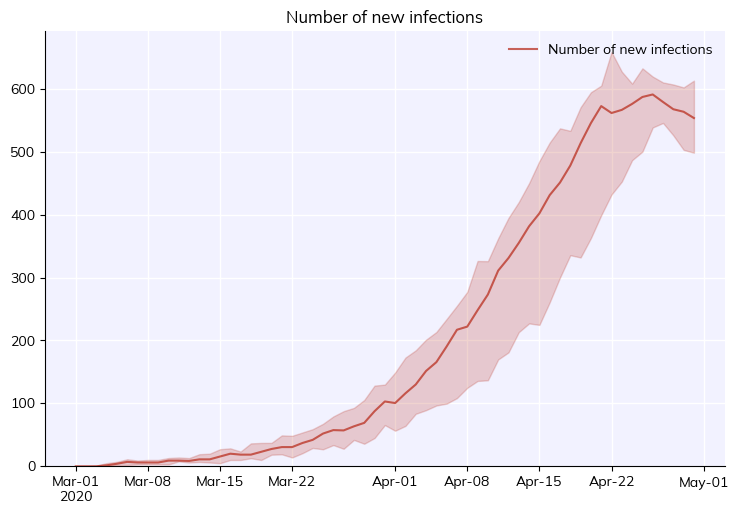

In [46]:

msims.median()
msims.plot_result('new_infections')

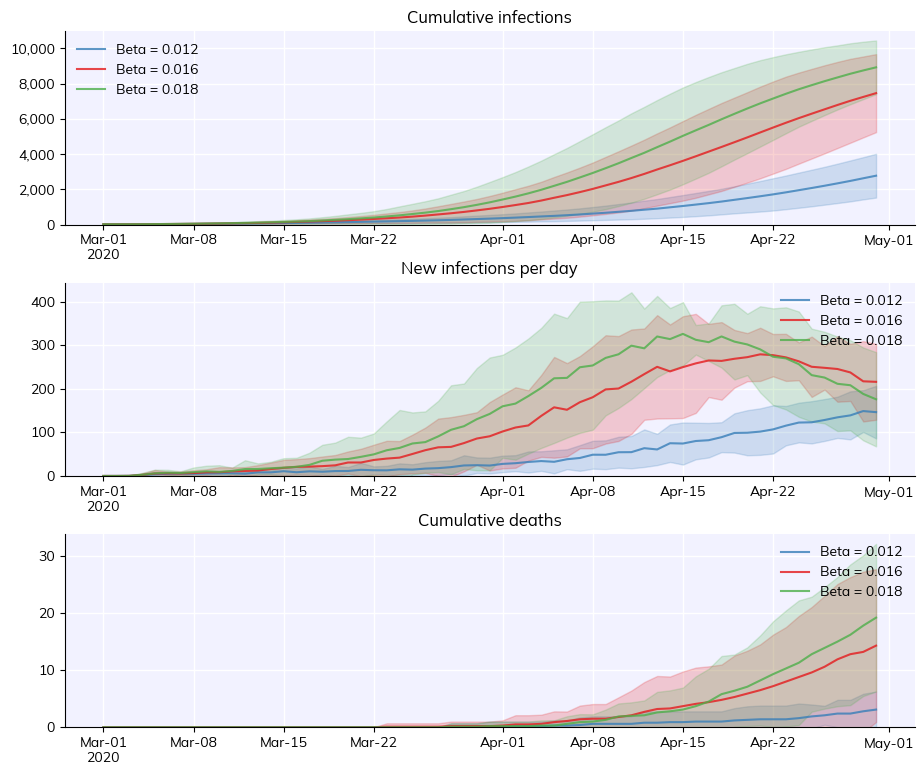

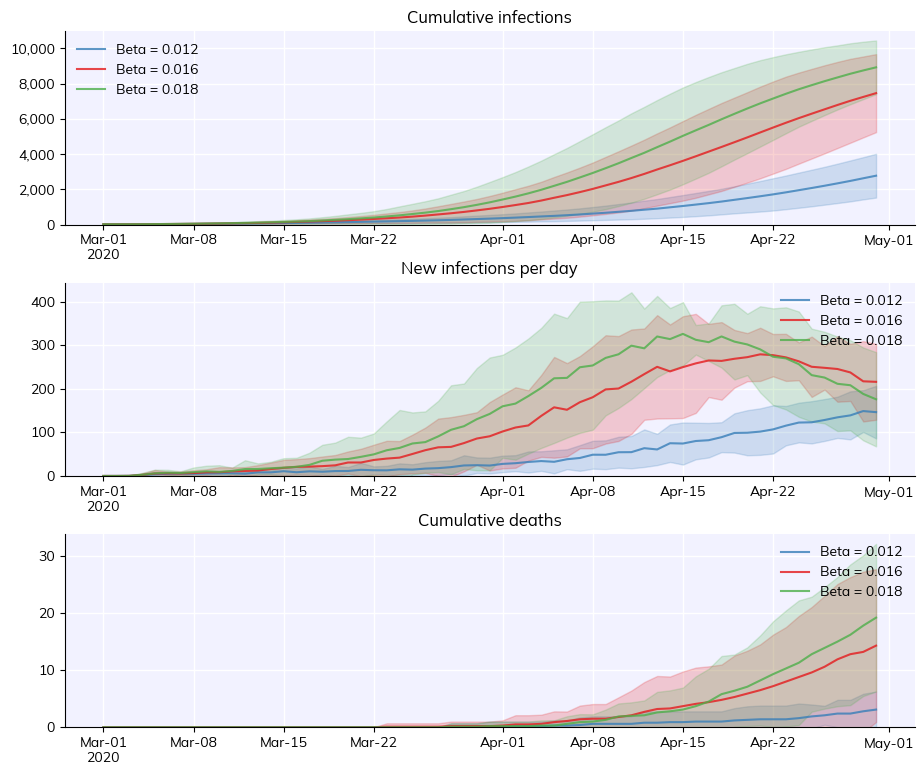

In [52]:
n_sims = 10

betas = [0.012, 0.016, 0.018]

msims = []
for beta in betas:
    sims = []
    for s in range(n_sims):
        sim = cv.Sim(pop_size=10e3, beta=beta, rand_seed=s, label=f'Beta = {beta}')
        sims.append(sim)
    msim = cv.MultiSim(sims)
    msim.run()
    msim.mean()
    msims.append(msim)

merged = cv.MultiSim.merge(msims, base=True)
merged.plot(color_by_sim=True)

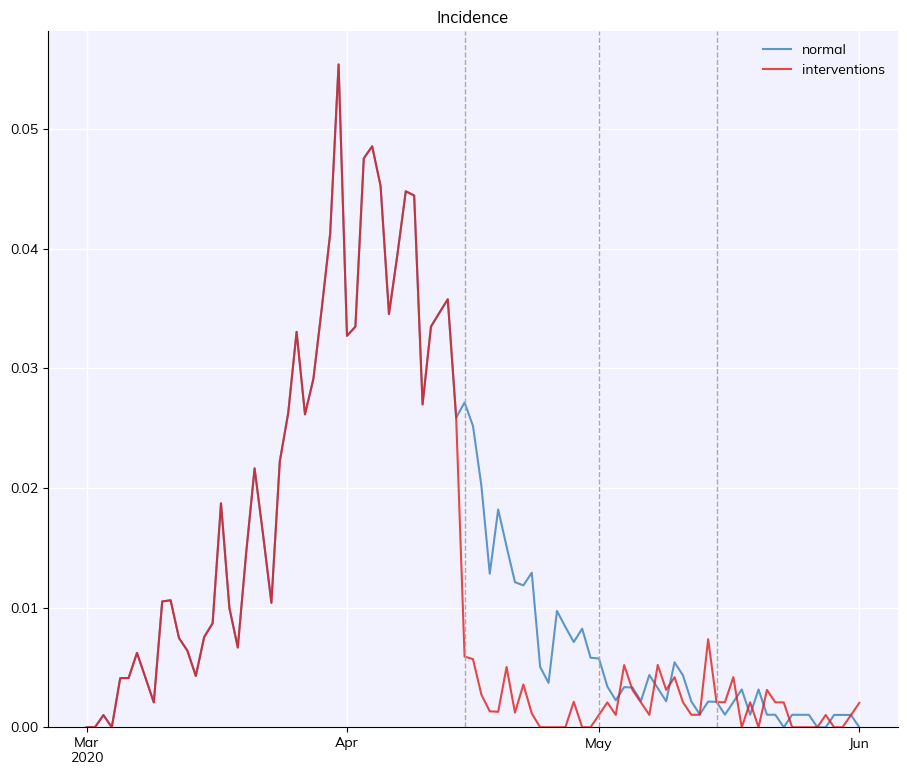

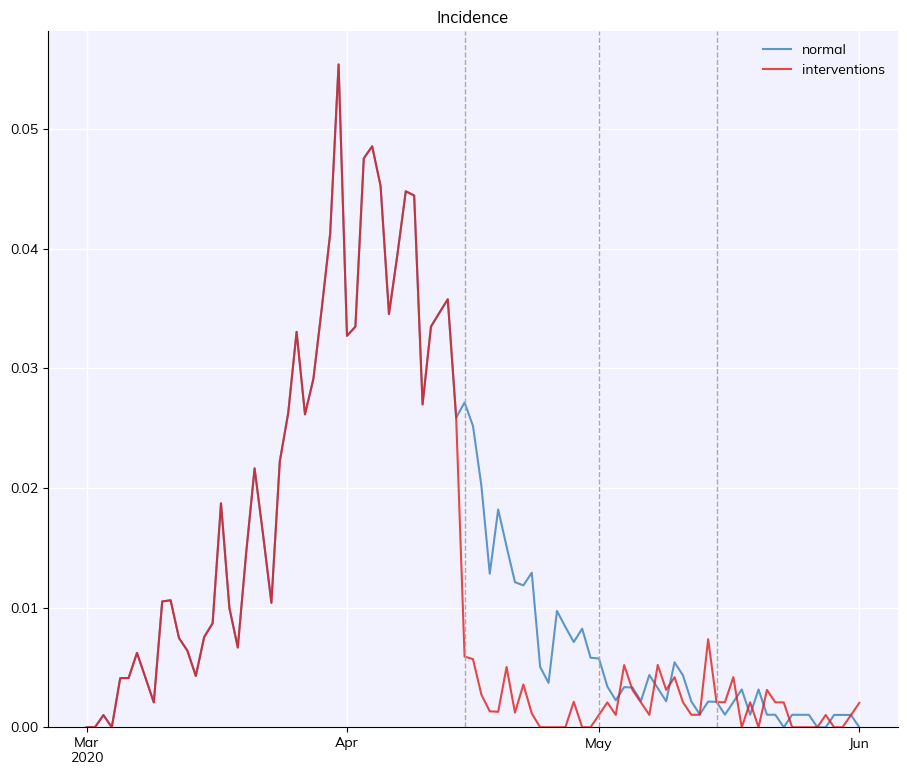

In [119]:
parameters_sweden=dict(pop_size=1000,  #  10368969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                            start_day = '2020-03-01',
                            end_day   = '2020-06-01',
                            pop_type = 'hybrid',
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            beta=0.015 # value to change
                            )



# interventions of changing beta

cb = cv.change_beta(days=['2020-04-15', '2020-05-01', '2020-05-15'], changes=[0.2, 1.5, 0.7])



my_simulation_sweden=cv.Sim(parameters_sweden, label='normal')
my_simulation_sweden_interventions=cv.Sim(parameters_sweden, interventions=cb, label='interventions')

# my_simulation_sweden.initialize() # Create people
# fig = my_simulation_sweden.people.plot() # Show statistics of the people
msim=cv.parallel(my_simulation_sweden, my_simulation_sweden_interventions)
msim.plot()